In [1]:
%%time
# basic imports
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


CPU times: total: 2.42 s
Wall time: 3.85 s


In [2]:
df = pd.read_csv('order_data_V2.csv')
df.head()

,order_id,customer_id,product_id,distance,product_rating,date,review,time_taken,place_id,product,product_description,product_type,place_type,place_name,place_address,place_phone_no
0,0,0,3711,46.99,3,6-4-22,0,43,88,Gala,"Gala, a popular on-the-go snack, has become synonymous with convenience and flavor. These savory meat pies consist of a flaky pastry crust filled with a well-seasoned mixture of minced meat, vegetables, and spices.",snacks,cafes,Krispy Kreme,"389C Herbert Macaulay Way, Yaba, Lagos, Nigeria",NaN
1,1,665,3206,28.87,4,30-10-22,1,44,55,Chicken Pie,This is another version of meat pie. The difference from the classic one is that the filling is chicken instead of beef. It is loaded with chicken flavor and equally delicious.,snacks,restaurant,Marco-Polo Chinese Restaurant,"9A Karimu Kotun Street, Victoria Island, Lagos, Nigeria","01 270 0248, 01 444 8938"
2,2,315,2717,44.05,5,27-6-22,1,55,19,Spicy Puff Puff,"This is for spicy food lovers. This version is an alternative to the sweet puff puff recipe. It is not so sweet because of its low sugar but spicy, soft, and savory.",snacks,restaurant,China Restaurant And Bar,"26, Metro College, Oshodi Isolo, Lagos, Nigeria",0806 329 5125
3,3,888,3624,10.58,3,15-6-22,0,35,83,Sandwich,"A sandwich is a food typically consisting of vegetables, sliced cheese or meat, placed on or between slices of bread, or more generally any dish wherein bread serves as a container or wrapper for another food type.",snacks,cafes,Fresh Forte,"12E Admiralty Way, Lekki, Lagos, Nigeria",NaN
4,4,332,2315,3.88,3,6-10-22,0,10,61,Grilled Plantains,"Grilled plantain is a street food in Nigeria. A satisfying plantain recipe that is grilled over hot charcoal. All you need is a ripe plantain; no salt or sugar is required. It hits differently when you serve it with groundnut, pepper sauce, or fried egg.",meal,restaurant,PJ Foods,"KM 3 Lasu Iba Road, By First Gate Bus-Stop Agboroko, Ojo, Lagos","0913 427 2579, 0813 368 8523"


In [3]:
# load data
menu_df = pd.read_csv('menu_price.csv')
menu_df.head()

,product_id,place_id,product,product_description,product_type,price
0,0,0,Whisky,"While brandy is generally made from grapes, that is, any distilled liquor made from fermented fruit juice is called brandy. Whiskey is made from grain, typically malted barley, corn, or other cereal grains, which is essentially brewed and fermented into beer.",drink,5800
1,1,0,Pineapple Drink,"Made with the normally discarded bits of pineapple – the skin and core, this has a distinct, clear pineapple flavour. Spice with cloves, ginger and other aromatics.",drink,2100
2,2,0,Daiquiri,"If you like your liquor sweetish, then the daiquiri is the way to go. This rum-based cocktail combines a mix of rum, citrus juice (typically lime) and sugar or any other sweetner. It also has other variations like the widely popular strawberry daiquiri.",drink,4300
3,3,0,Beer,"Beer is brewed from cereal grains most commonly from malted barley, however, wheat, corn, and rice are also used.",drink,700
4,4,0,Long Island Iced Tea,"Long island iced tea is made with tequila, vodka, light rum, triple sec, gin and a splash of cola.",drink,3700


In [4]:
# shape of dataset
print(df.shape)
print(menu_df.shape)

(9024, 16)
(3742, 6)


In [5]:
# Merge df and menu_df
df = df.merge(menu_df, on=['product_id','place_id'], how='left')
df.head(1)

,order_id,customer_id,product_id,distance,product_rating,date,review,time_taken,place_id,product_x,product_description_x,product_type_x,place_type,place_name,place_address,place_phone_no,product_y,product_description_y,product_type_y,price
0,0,0,3711,46.99,3,6-4-22,0,43,88,Gala,"Gala, a popular on-the-go snack, has become synonymous with convenience and flavor. These savory meat pies consist of a flaky pastry crust filled with a well-seasoned mixture of minced meat, vegetables, and spices.",snacks,cafes,Krispy Kreme,"389C Herbert Macaulay Way, Yaba, Lagos, Nigeria",NaN,Gala,"Gala, a popular on-the-go snack, has become synonymous with convenience and flavor. These savory meat pies consist of a flaky pastry crust filled with a well-seasoned mixture of minced meat, vegetables, and spices.",snacks,700


In [6]:
# check df columns
df.columns

Index(['order_id', 'customer_id', 'product_id', 'distance', 'product_rating',
       'date', 'review', 'time_taken', 'place_id', 'product_x',
       'product_description_x', 'product_type_x', 'place_type', 'place_name',
       'place_address', 'place_phone_no', 'product_y', 'product_description_y',
       'product_type_y', 'price'],
      dtype='object')

In [7]:
#drop irrelevant and duplicate columns
cols_to_drop = ['product_y', 'product_description_y', 'product_type_y']
df.drop(cols_to_drop, axis=1, inplace=True) 

In [8]:
# rename some columns
df = df.rename(columns = {'distance':'distance_km',
                          'time_taken':'time_taken(min)',
                          'product_type_x':'product_type',
                          'product_x':'product',
                          'product_description_x':'product_description'})
df.head(1)

,order_id,customer_id,product_id,distance_km,product_rating,date,review,time_taken(min),place_id,product,product_description,product_type,place_type,place_name,place_address,place_phone_no,price
0,0,0,3711,46.99,3,6-4-22,0,43,88,Gala,"Gala, a popular on-the-go snack, has become synonymous with convenience and flavor. These savory meat pies consist of a flaky pastry crust filled with a well-seasoned mixture of minced meat, vegetables, and spices.",snacks,cafes,Krispy Kreme,"389C Herbert Macaulay Way, Yaba, Lagos, Nigeria",NaN,700


In [9]:
# check shape of final data
df.shape

(9024, 17)

In [10]:
# Save merged df
df1 = df.to_csv('order_data_pr.csv',index=False)

In [11]:
# read new df
df = pd.read_csv('order_data_pr.csv')
df.head(1)

,order_id,customer_id,product_id,distance_km,product_rating,date,review,time_taken(min),place_id,product,product_description,product_type,place_type,place_name,place_address,place_phone_no,price
0,0,0,3711,46.99,3,6-4-22,0,43,88,Gala,"Gala, a popular on-the-go snack, has become synonymous with convenience and flavor. These savory meat pies consist of a flaky pastry crust filled with a well-seasoned mixture of minced meat, vegetables, and spices.",snacks,cafes,Krispy Kreme,"389C Herbert Macaulay Way, Yaba, Lagos, Nigeria",NaN,700


In [12]:
# extract day from date
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.weekday
# extract month from data
df['month'] = df['date'].dt.month
df[['day_of_week','month']].head()

,day_of_week,month
0,5,6
1,6,10
2,0,6
3,2,6
4,4,6


In [13]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9024 entries, 0 to 9023
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             9024 non-null   int64         
 1   customer_id          9024 non-null   int64         
 2   product_id           9024 non-null   int64         
 3   distance_km          9024 non-null   float64       
 4   product_rating       9024 non-null   int64         
 5   date                 9024 non-null   datetime64[ns]
 6   review               9024 non-null   int64         
 7   time_taken(min)      9024 non-null   int64         
 8   place_id             9024 non-null   int64         
 9   product              9024 non-null   object        
 10  product_description  9024 non-null   object        
 11  product_type         9024 non-null   object        
 12  place_type           9024 non-null   object        
 13  place_name           9024 non-nul

In [14]:
# Check duplicates
df.duplicated().any()

False

In [15]:
# Check null
df.isna().sum()

order_id                  0
customer_id               0
product_id                0
distance_km               0
product_rating            0
date                      0
review                    0
time_taken(min)           0
place_id                  0
product                   0
product_description       0
product_type              0
place_type                0
place_name                0
place_address           527
place_phone_no         3540
price                     0
day_of_week               0
month                     0
dtype: int64

In [16]:
# drop irrelevant  columns
columns = ['place_address', 'place_phone_no']
df.drop(columns=columns, inplace=True)

## EDA

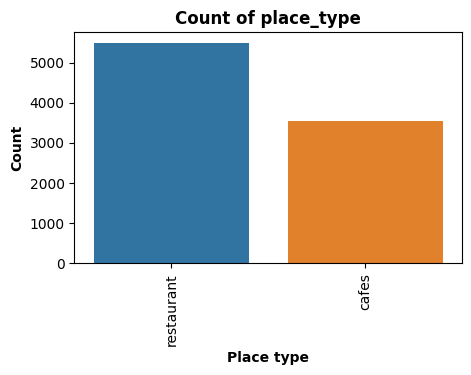

In [17]:
# Count of place_name
plt.figure(figsize=[5,3])
freq = df.place_type.value_counts()
col_order = freq.index
sb.countplot(data=df, x='place_type',order=col_order)
plt.title('Count of place_type', fontweight="bold")
plt.xlabel('Place type', fontweight="bold")
plt.ylabel('Count', fontweight="bold")
plt.xticks(rotation=90);

The chart above shows restaurant are more than cafes

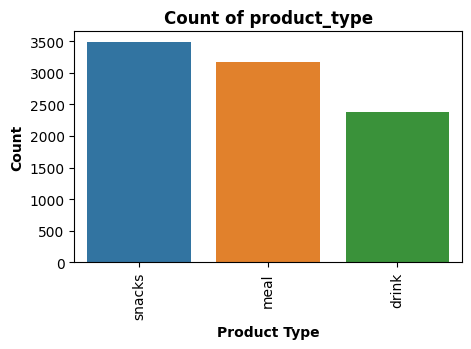

In [18]:
# Check count of each product type
plt.figure(figsize=[5,3])
freq = df.product_type.value_counts()
col_order = freq.index
sb.countplot(data=df, x='product_type',order=col_order)
plt.title('Count of product_type', fontweight="bold")
plt.xlabel('Product Type', fontweight="bold")
plt.ylabel('Count', fontweight="bold")
plt.xticks(rotation=90);

The count of product type shows that snacks are the most ordered product type

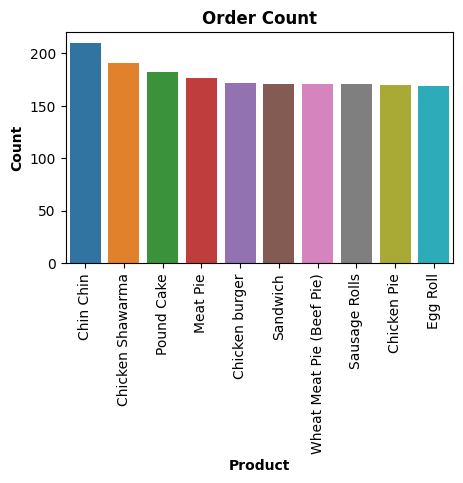

In [19]:
# Top ten products with highest order
plt.figure(figsize=[5,3])
freq = df['product'].value_counts()[:10]
col_order = freq.index
sb.countplot(data=df, x='product',order=col_order)
plt.title('Order Count', fontweight="bold")
plt.xlabel('Product', fontweight="bold")
plt.ylabel('Count', fontweight="bold")
plt.xticks(rotation=90);

The bar chart shows the ten most common ordered products. Chin Chin had the highest order, followed by Chicken Shawarma and Pound Cake

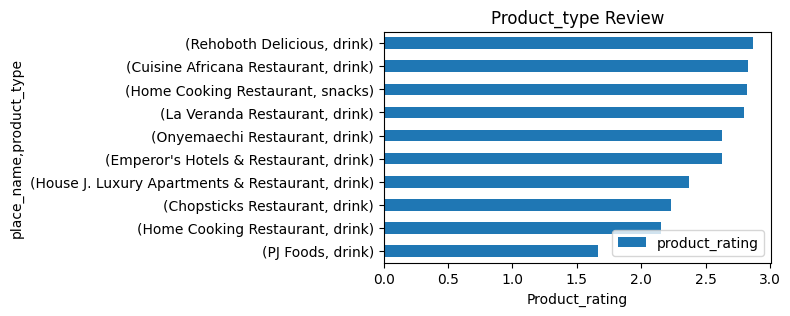

In [20]:
# Top 10 product type with highest rating
df_top_pd = df.groupby(['place_name','product_type']).agg({'product_rating':'mean'})
df_top_pd = df_top_pd.sort_values('product_rating')[:10].plot(kind='barh',
                                          xlabel='Product_rating', title='Product_type Review', figsize=[5,3]);
#sb.barplot(data=df_top_pd, x='place_name', y='product_rating', hue='product_type');


The chart above shows the product types with the highest rating and the place they can be got. Drinks from Rehobort restaurant had the highest rating, followed by Cuisine African Restaurant drinks and snacks from home cooking restaurant

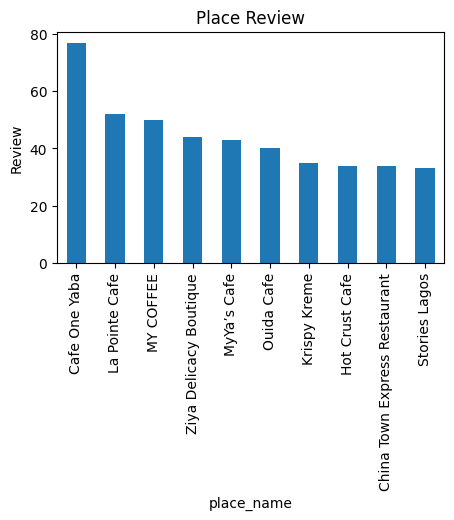

In [21]:
# Top 10 places with highest review
df.groupby('place_name')['review'].agg(sum).sort_values(ascending=False)[:10].plot(kind='bar',
                                    xlabel='place_name', ylabel='Review', title='Place Review',figsize=[5,3]);

The chart above shows the places with the highest reviews. Cafe One Yaba got the highest reviews, followed by La Pointe Cafe and My Coffee

In [22]:
# Transforming day_of_week
weekday = {0: "Sunday", 1:"Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6:"Saturday"}

# Transforming month_name
monthname = {1:"January", 2: "February", 3: "March", 4: "April", 5: "May", 6:"June",
             7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
df['month'] = df['month'].map(monthname)
df['day_of_week'] = df['day_of_week'].map(weekday)
df[['day_of_week','month']].head()

,day_of_week,month
0,Friday,June
1,Saturday,October
2,Sunday,June
3,Tuesday,June
4,Thursday,June


In [23]:
df['day_of_week']= df['day_of_week'].astype('object')
df['month']= df['month'].astype('object')

In [24]:
df.dtypes

order_id                        int64
customer_id                     int64
product_id                      int64
distance_km                   float64
product_rating                  int64
date                   datetime64[ns]
review                          int64
time_taken(min)                 int64
place_id                        int64
product                        object
product_description            object
product_type                   object
place_type                     object
place_name                     object
price                           int64
day_of_week                    object
month                          object
dtype: object

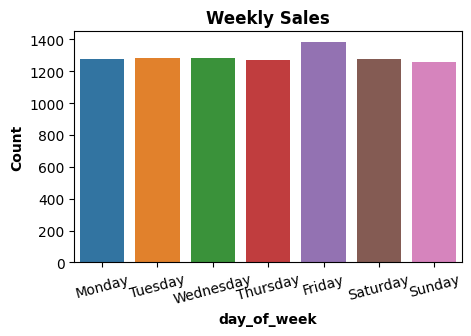

In [25]:
# Weekly sales
plt.figure(figsize=[5,3])
day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_name = pd.api.types.CategoricalDtype(categories=day, ordered=True)
df['day_of_week'] = df['day_of_week'].astype(day_name)
sb.countplot(data=df, x='day_of_week',order=day)
plt.xlabel('day_of_week', fontweight="bold")
plt.ylabel('Count', fontweight="bold")
plt.title('Weekly Sales', fontweight="bold")
plt.xticks(rotation=15);

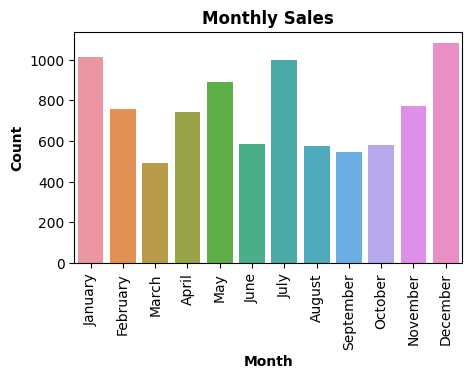

In [26]:
# Monthly sales
plt.figure(figsize=[5,3])
month =  ["January","February","March","April","May","June", 
            "July","August","September","October","November","December"]
month_name = pd.api.types.CategoricalDtype(categories=month, ordered=True)
df['month'] = df['month'].astype(month_name)
sb.countplot(data=df, x='month',order=month)
plt.xlabel('Month', fontweight="bold")
plt.ylabel('Count', fontweight="bold")
plt.title('Monthly Sales', fontweight="bold")
plt.xticks(rotation=(90));

From the chart above, we can deduce that order were highest in december.

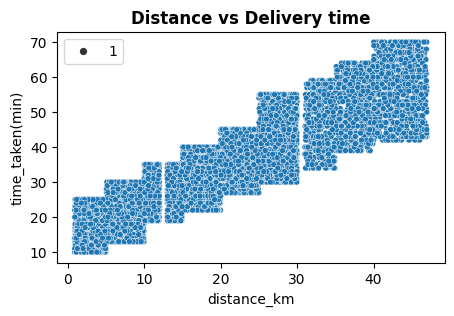

In [27]:
# Relatioship between distance and time taken
plt.figure(figsize=[5,3])
sb.scatterplot(data=df, x="distance_km", y="time_taken(min)", size=1)
plt.title("Distance vs Delivery time", fontweight='bold');

The scatter plot shows a positive relationship between distance and time taken, ie the longer the user distance to the restarant, the longer the estimated delivery time taken.

In [28]:
df.head(1)

,order_id,customer_id,product_id,distance_km,product_rating,date,review,time_taken(min),place_id,product,product_description,product_type,place_type,place_name,price,day_of_week,month
0,0,0,3711,46.99,3,2022-06-04,0,43,88,Gala,"Gala, a popular on-the-go snack, has become synonymous with convenience and flavor. These savory meat pies consist of a flaky pastry crust filled with a well-seasoned mixture of minced meat, vegetables, and spices.",snacks,cafes,Krispy Kreme,700,Friday,June
